In [11]:
import numpy as np
import matplotlib.pyplot as plt

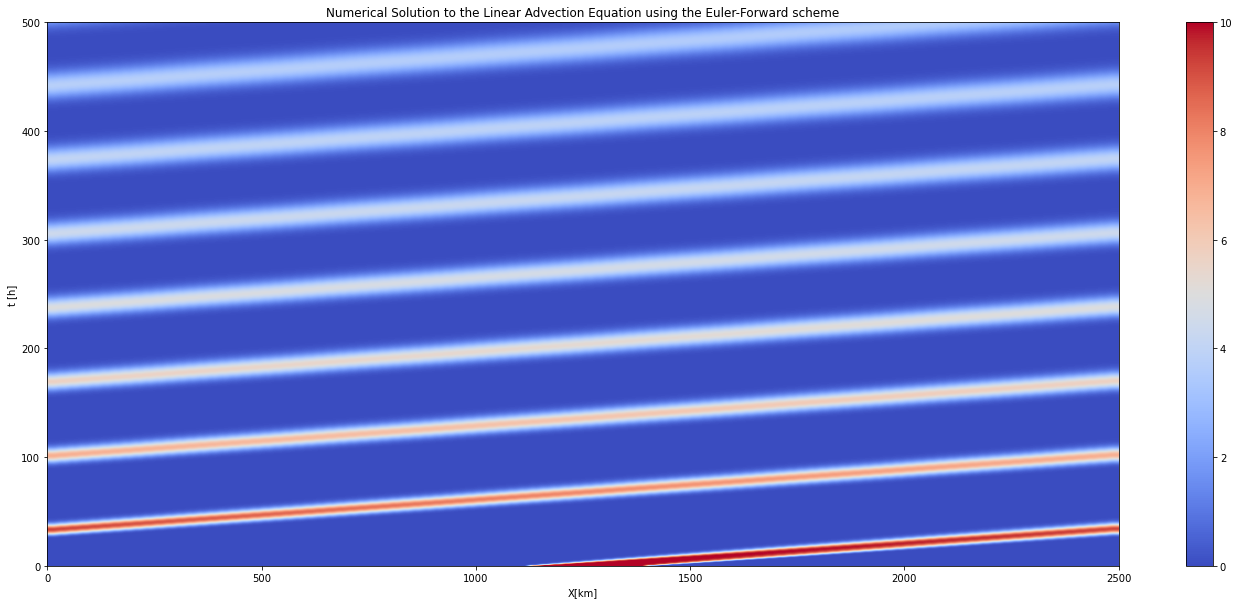

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid parameters
dx = 25e3   # Spatial step size
dt = 2000  # Temporal step size
L = 2500e3   # Domain length
T = 500*3600     # Simulation time
c0 = 10    # Constant value for initial condition

# Define the velocity and initial condition
u = 10 #m/s

def initial_condition(x):
    if x < 1125e3 or x > 1375e3:
        return 0
    else:
        return c0

# Create the grid
x = np.arange(0, L, dx)
t = np.arange(0, T, dt)

# Initialize the solution matrix
C = np.zeros((len(t), len(x)))

# Set the initial condition
for j in range(len(x)):
    C[0,j] = initial_condition(x[j])

# Compute the solution using the Euler forward in time and upwind in space method
for i in range(len(t)-1):
    for j in range(1, len(x)):
        C[i+1,j] = C[i,j] - (u*dt/dx)*(C[i,j]-C[i,j-1])
        # Apply periodic boundary conditions
    C[i+1,0] = C[i+1,-2]
    C[i+1,-1] = C[i+1,1]

    
    
# Plot the solution
plt.figure(figsize=(24,10))
plt.imshow(C, aspect='auto', cmap='coolwarm', origin='lower', extent=[0, L/1e3, 0, T/3600])

plt.colorbar()
plt.xlabel('X[km]')
plt.ylabel('t [h]')
plt.title('Numerical Solution to the Linear Advection Equation using the Euler-Forward scheme')
plt.show()


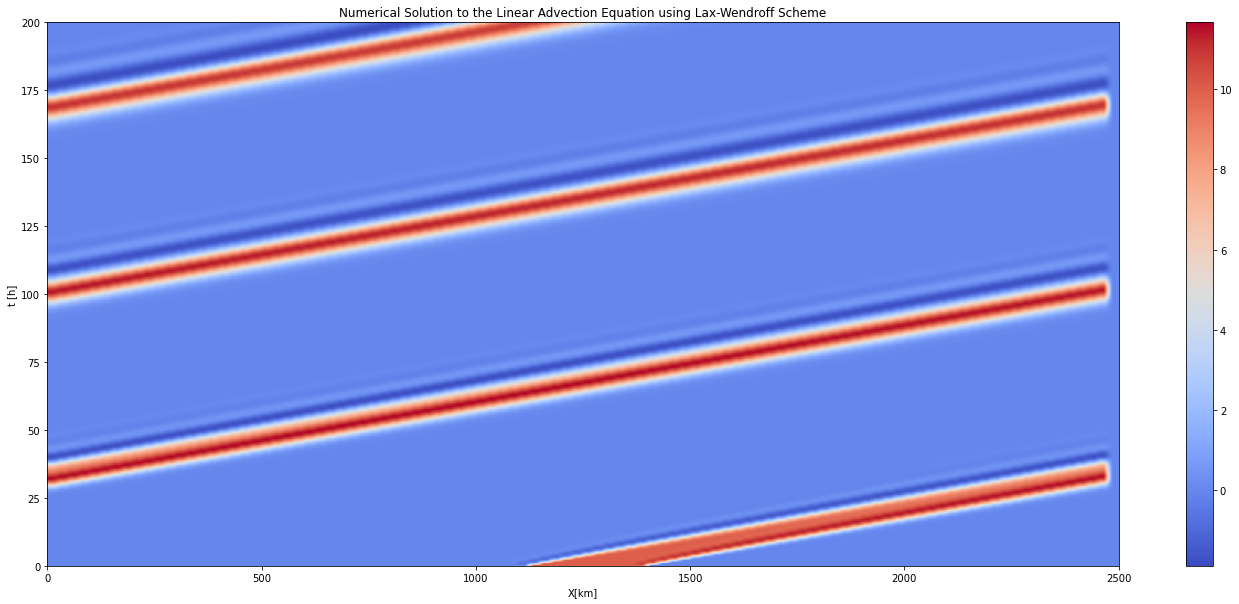

In [158]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid parameters
dx = 25e3   # Spatial step size
dt = 2000  # Temporal step size
L = 2500e3   # Domain length
T = 200*3600     # Simulation time
c0 = 10    # Constant value for initial condition

# Define the velocity and initial condition
u0 = 10 #m/s

def initial_condition(x):
    if x < 1125e3 or x > 1375e3:
        return 0
    else:
        return c0

# Create the grid
x = np.arange(0, L, dx)
t = np.arange(0, T, dt)

# Initialize the solution matrix
C = np.zeros((len(t), len(x)))

# Set the initial condition
for j in range(len(x)):
    C[0,j] = initial_condition(x[j])

# Compute the solution using the Euler forward in time and upwind in space method
for i in range(len(t)-1):
    for j in range(1, len(x)-2):
        C[i+1,j] = C[i,j]-(u0*dt/(2*dx)) * ((C[i,j+1]-C[i,j-1])) + 0.5*(np.square(u0)*np.square(dt)/np.square(dx))*(C[i,j+1]-2*C[i,j]+C[i,j-1]) 
#         Apply periodic boundary conditions
    C[i+1,0] = C[i+1,-3]
    C[i+1,-2] = C[i+1,1]
    


# Plot the solution
plt.figure(figsize=(24,10))
plt.imshow(C, aspect='auto', cmap='coolwarm', origin='lower', extent=[0, L/1e3, 0, T/3600])

plt.colorbar()
plt.xlabel('X[km]')
plt.ylabel('t [h]')
plt.title('Numerical Solution to the Linear Advection Equation using Lax-Wendroff Scheme')
plt.show()


# Difusie!! belangrijk

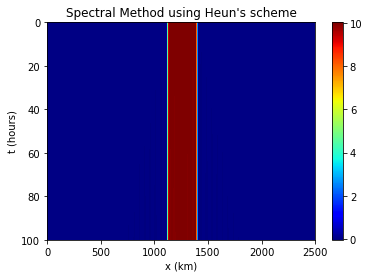

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq

# Define the grid parameters
dx = 25e3    # Spatial step size
dt = 2000    # Temporal step size
L = 2500e3   # Domain length
T = 100*3600 # Simulation time

# Define the velocity and initial condition
u = 10 # m/s
c0 = 10



# Create the grid
x = np.arange(0, L, dx)
t = np.arange(0, T, dt)

# Compute the wavenumber
k = fftfreq(len(x), dx)

# Initialize the solution matrix
C = np.zeros((len(t), len(x)))

for j in range(len(x)):
    C[0,j] = initial_condition(x[j])
    
    
# Define the spectral operator
L_op = -(u/dx)*2j*np.pi*k

# Compute the solution using the Heun's scheme
for i in range(len(t)-1):
    # First step of Heun's scheme
    C_hat = fft(C[i,:])
    C_tilde = C_hat + dt*L_op*C_hat
    C_tilde = np.real(ifft(C_tilde))
    # Second step of Heun's scheme
    C_hat_tilde = fft(C_tilde)
    C[i+1,:] = np.real(ifft(0.5*(C_hat + C_hat_tilde + dt*L_op*C_hat_tilde)))
    
    # Apply periodic boundary conditions
    C[i+1,0] = C[i+1,-2]
    C[i+1,-1] = C[i+1,1]

    
# Plot the solution
plt.imshow(C, cmap='jet', aspect='auto', extent=[0, L/1e3, T/3600, 0])
plt.colorbar()
plt.xlabel('x (km)')
plt.ylabel('t (hours)')
plt.title('Spectral Method using Heun\'s scheme')
plt.show()


In [169]:
import numpy as np

def solve_advection_equation(method):
    # Define the grid parameters
    dx = 25e3   # Spatial step size
    dt = 1000  # Temporal step size
    L = 1500e3   # Domain length
    T = 160*3600     # Simulation time
    c0 = 10    # Constant value for initial condition

    # Define the velocity and initial condition
    u = 10 #m/s

    def initial_condition(x):
        if x < 1125e3 or x > 1375e3:
            return 0
        else:
            return c0

    # Create the grid
    x = np.arange(0, L, dx)
    t = np.arange(0, T, dt)

    # Initialize the solution matrix
    C = np.zeros((len(t), len(x)))

    # Set the initial condition
    for j in range(len(x)):
        C[0,j] = initial_condition(x[j])

    # Compute the solution using the specified difference integration method
    if method == 'Euler':
        for i in range(len(t)-1):
            for j in range(1, len(x)):
                C[i+1,j] = C[i,j] - (u*dt/dx)*(C[i,j]-C[i,j-1])
                # Apply periodic boundary conditions
            C[i+1,0] = C[i+1,-2]
            C[i+1,-1] = C[i+1,1]
    elif method == 'Lax-Wendroff':
        u0 = 10 #m/s
        for i in range(len(t)-1):
            for j in range(1, len(x)-2):
                C[i+1,j] = C[i,j]-(u0*dt/(2*dx)) * ((C[i,j+1]-C[i,j-1])) + 0.5*(np.square(u0)*np.square(dt)/np.square(dx))*(C[i,j+1]-2*C[i,j]+C[i,j-1]) 
            # Apply periodic boundary conditions
            C[i+1,0] = C[i+1,-3]
            C[i+1,-2] = C[i+1,1]
    
    return C


AttributeError: 'Figure' object has no attribute 'set_title'

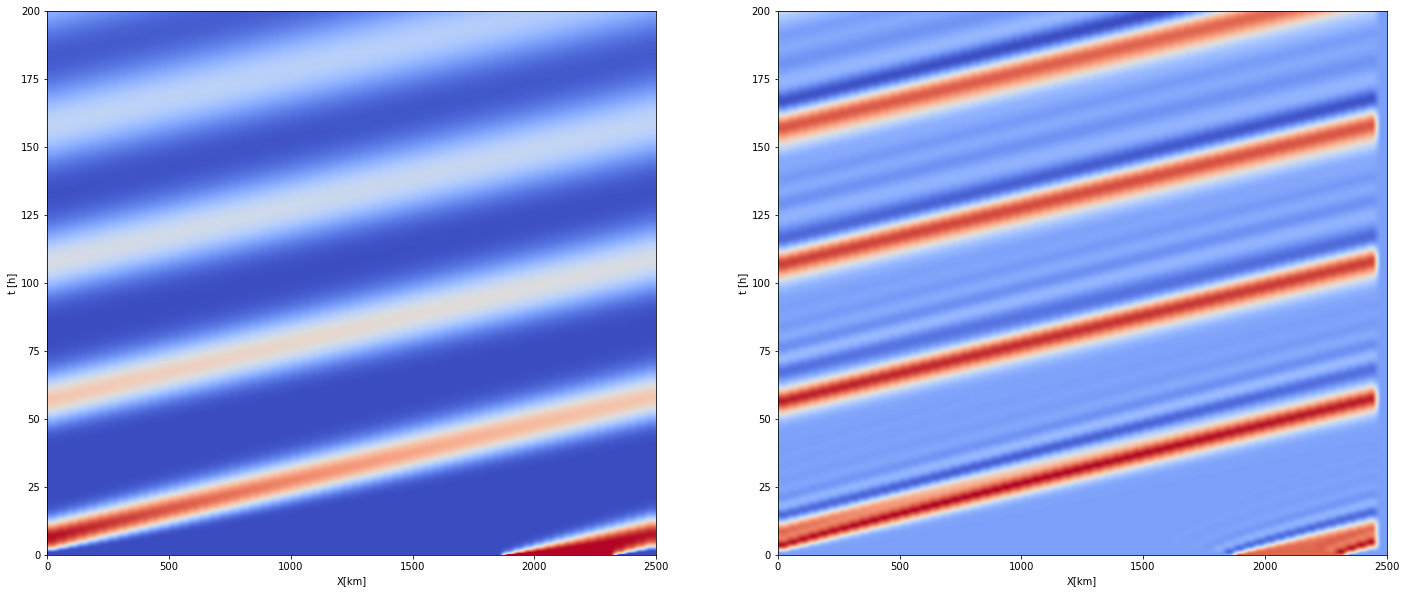

In [188]:
# Plot the solution
fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)

axs[0].imshow(solve_advection_equation('Euler'), aspect='auto', cmap='coolwarm', origin='lower', extent=[0, L/1e3, 0, T/3600])


axs[0].set_xlabel('X[km]')
axs[0].set_ylabel('t [h]')

axs[1].imshow(solve_advection_equation('Lax-Wendroff'), aspect='auto', cmap='coolwarm', origin='lower', extent=[0, L/1e3, 0, T/3600])
axs[1].set_xlabel('X[km]')
axs[1].set_ylabel('t [h]')


fig.set_title('Numerical Solution to the Linear Advection Equation using Lax-Wendroff Scheme')
fig.tight_layout()
plt.show()
